## **Observations and Insights**

- Mouse sex was very evenly distributed in this study, w/ 50.6% of mice being male compared to 49.4% being female.
- Tumor volume appears to be influenced by weight in mice treated w/ Capomulin. Heavier mice, in general, had larger tumors. The correlation coefficient for this relationship is ~0.84.
- Capomulin was very effective in reducing tumor volume in mouse 's185'. Tumor volume was decreased by ~50% over the span of 45 minutes.
- In this study, of the 4 most promising drugs based on tumor volume, Ramicane and Capomulin were, on average, more effective in reducing tumor volume than Infubinol and Ceftamin.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
mouse_df = pd.read_csv('data/Mouse_metadata.csv')
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
mouse_df.shape

(249, 5)

In [4]:
results_df = pd.read_csv('data/Study_results.csv')
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
results_df.shape

(1893, 4)

In [6]:
merged_df = mouse_df.merge(results_df, on=['Mouse ID', 'Mouse ID'])
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
merged_df['Drug Regimen'].nunique()

10

## **Summary Dataframe**

In [8]:
summary_df = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median','var', 'std', 'sem'])
columns = [('Tumor Volume', 'mean'), ('Tumor Volume', 'median'), ('Tumor Volume', 'var'), ('Tumor Volume', 'std'), ('Tumor Volume', 'sem')]
summary_df.columns = pd.MultiIndex.from_tuples(columns, sortorder=1)
summary_df

Tumor Volume                                          
                     mean     median        var       std       sem
Drug Regimen                                                       
Capomulin       40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin        52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol       52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril        55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol        54.331565  52.509285  66.173479  8.134708  0.596466
Placebo         54.033581  52.288934  61.168083  7.821003  0.581331
Propriva        52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane        40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn        54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol       53.236507  51.818479  48.533355  6.966589  0.516398

## **Bar Plot Using Pandas Plotting**

In [9]:
treatment_counts = merged_df.groupby('Drug Regimen')['Drug Regimen'].count()
treatment_counts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

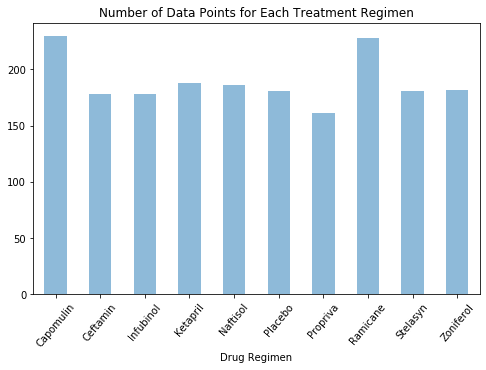

In [10]:
treatment_counts.plot(kind='bar', rot=50, title='Number of Data Points for Each Treatment Regimen', alpha=0.5, figsize=(8,5), width=0.5);

## **Bar Plot Using Matplotlib Plotting**

In [11]:
treatment_counts.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

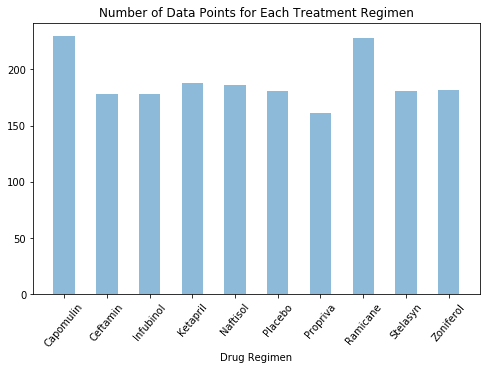

In [12]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(treatment_counts.index, treatment_counts, alpha=0.5, width=0.5)
ax.set_title('Number of Data Points for Each Treatment Regimen')
plt.xticks(rotation=50)
ax.set_xlabel('Drug Regimen');

In [13]:
sex_counts = merged_df['Sex'].value_counts()
sex_counts

Male      958
Female    935
Name: Sex, dtype: int64

## **Pie Chart Using Pandas Plotting**

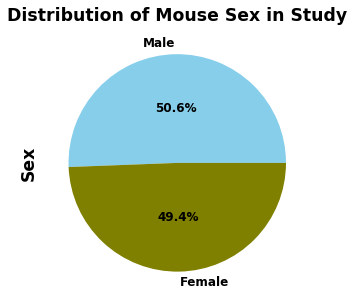

In [14]:
sex_counts = merged_df['Sex'].value_counts()
sex_pie_plot = sex_counts.plot(kind='pie', figsize=(8,5), pctdistance=.5, autopct='%1.1f%%', fontsize='large',textprops={'fontweight': 'bold'}, colors=['skyblue', 'olive'])
sex_pie_plot.set_ylabel('Sex', fontsize='xx-large', fontweight='bold')
sex_pie_plot.set_title('Distribution of Mouse Sex in Study', fontsize='xx-large', fontweight='bold');

## **Pie Chart Using Matplotlib Plotting**

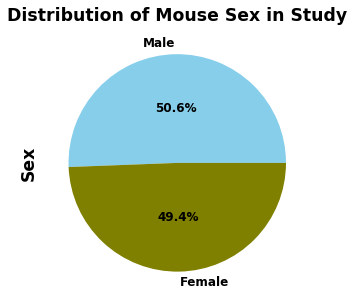

In [15]:
fig, ax = plt.subplots(figsize=(8,5))
ax.pie(sex_counts, labels=['Male', 'Female'], colors=['skyblue', 'olive'], pctdistance=.5, autopct='%1.1f%%',textprops={'fontweight': 'bold', 'fontsize': 'large'})
ax.set_ylabel('Sex', fontsize='xx-large', fontweight='bold')
ax.set_title('Distribution of Mouse Sex in Study', fontsize='xx-large', fontweight='bold');

In [16]:
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
merged_df['Mouse ID'].nunique()

249

In [18]:
df_most_promising = merged_df.loc[merged_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

In [19]:
df_most_promising['Drug Regimen'].nunique()

4

In [20]:
df_most_promising.loc[df_most_promising['Mouse ID'] == 'w584']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1720,w584,Infubinol,Male,3,29,0,45.000000,0
1721,w584,Infubinol,Male,3,29,5,46.051931,0
1722,w584,Infubinol,Male,3,29,10,47.298508,0
1723,w584,Infubinol,Male,3,29,15,51.265440,0
1724,w584,Infubinol,Male,3,29,20,53.323507,1
1725,w584,Infubinol,Male,3,29,25,55.650838,1
1726,w584,Infubinol,Male,3,29,30,58.268442,1


In [21]:
final_tumor_volume_df = df_most_promising.sort_values('Timepoint', ascending=False).drop_duplicates(['Mouse ID', 'Drug Regimen']).set_index('Mouse ID')
final_tumor_volume_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
z581,Infubinol,Female,24,25,45,62.754451,3
e476,Infubinol,Male,23,26,45,62.435404,1
c758,Ramicane,Male,9,17,45,33.397653,1
i557,Capomulin,Female,1,24,45,47.685963,1
m957,Capomulin,Female,3,19,45,33.329098,1


In [22]:
tumor_volume_quartiles_per_drug = final_tumor_volume_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile([.25, .5, .75])
tumor_volume_quartiles_per_drug.index

MultiIndex([('Capomulin', 0.25),
            ('Capomulin',  0.5),
            ('Capomulin', 0.75),
            ( 'Ceftamin', 0.25),
            ( 'Ceftamin',  0.5),
            ( 'Ceftamin', 0.75),
            ('Infubinol', 0.25),
            ('Infubinol',  0.5),
            ('Infubinol', 0.75),
            ( 'Ramicane', 0.25),
            ( 'Ramicane',  0.5),
            ( 'Ramicane', 0.75)],
           names=['Drug Regimen', None])

In [23]:
infubinol_quartiles = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)'].quantile([.25, .5, .75])
ramicane_quartiles = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'].quantile([.25, .5, .75])
capomulin_quartiles = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'].quantile([.25, .5, .75])
ceftamin_quartiles = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)'].quantile([.25, .5, .75])
print(infubinol_quartiles)
print(ramicane_quartiles)
print(capomulin_quartiles)
print(ceftamin_quartiles)

0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64


In [24]:
quartiles_df = pd.DataFrame(tumor_volume_quartiles_per_drug).unstack(level=-1)
quartiles_df.columns = ['Lower Q', 'Median', 'Upper Q']
quartiles_df['IQR'] = quartiles_df['Upper Q'] - quartiles_df['Lower Q']
quartiles_df['Lower Outlier Boundary'] = quartiles_df['Lower Q'] - (1.5 * quartiles_df['IQR'])
quartiles_df['Upper Outlier Boundary'] = quartiles_df['Upper Q'] + (1.5 * quartiles_df['IQR'])
quartiles_df

,Lower Q,Median,Upper Q,IQR,Lower Outlier Boundary,Upper Outlier Boundary
Drug Regimen,,,,,,
Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015
Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458
Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446
Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811


In [25]:
quartiles_df.loc['Infubinol','Lower Outlier Boundary']

36.83290494999999

In [26]:
final_tumor_volume_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
z581,Infubinol,Female,24,25,45,62.754451,3
e476,Infubinol,Male,23,26,45,62.435404,1
c758,Ramicane,Male,9,17,45,33.397653,1
i557,Capomulin,Female,1,24,45,47.685963,1
m957,Capomulin,Female,3,19,45,33.329098,1


In [27]:
#final_tumor_volume_df.query("`Drug Regimen` == 'Infubinol' & `Tumor Volume (mm3)` > @quartiles_df.loc['Infubinol','Upper Outlier Boundary']")

In [28]:
df_most_promising['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin'], dtype=object)

In [29]:
drug_regimens = df_most_promising['Drug Regimen'].unique()
volume_list = []
for regimen in drug_regimens:
    volumes = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    volume_list.append(volumes)
ramicane_volumes = volume_list[0]
capomulin_volumes = volume_list[1]
infubinol_volumes = volume_list[2]
ceftamin_volumes = volume_list[3]

In [30]:
len(ramicane_volumes)

25

In [31]:
capomulin_volumes

Mouse ID
i557    47.685963
m957    33.329098
r554    32.377357
y793    31.896238
u364    31.023923
t565    34.455298
g288    37.074024
l897    38.846876
b742    38.939633
w914    36.041047
b128    38.982878
j119    38.125164
i738    37.311846
v923    40.658124
g316    40.159220
s710    40.728578
l509    41.483008
r944    41.581521
x401    28.484033
m601    28.430964
s185    23.343598
j246    38.753265
f966    30.485985
r157    46.539206
w150    39.952347
Name: Tumor Volume (mm3), dtype: float64

In [32]:
ramicane_lower_outliers = [volume for volume in ramicane_volumes if volume < quartiles_df.loc['Ramicane','Lower Outlier Boundary']]
ramicane_upper_outliers = [volume for volume in ramicane_volumes if volume > quartiles_df.loc['Ramicane','Upper Outlier Boundary']]
ramicane_outliers = ramicane_lower_outliers + ramicane_upper_outliers

capomulin_lower_outliers = [volume for volume in capomulin_volumes if volume < quartiles_df.loc['Capomulin','Lower Outlier Boundary']]
capomulin_upper_outliers = [volume for volume in capomulin_volumes if volume > quartiles_df.loc['Capomulin','Upper Outlier Boundary']]
capomulin_outliers = capomulin_lower_outliers + capomulin_upper_outliers

infubinol_lower_outliers = [volume for volume in infubinol_volumes if volume < quartiles_df.loc['Infubinol','Lower Outlier Boundary']]
infubinol_upper_outliers = [volume for volume in infubinol_volumes if volume > quartiles_df.loc['Infubinol','Upper Outlier Boundary']]
infubinol_outliers = infubinol_lower_outliers + infubinol_upper_outliers

ceftamin_lower_outliers = [volume for volume in ceftamin_volumes if volume < quartiles_df.loc['Ceftamin','Lower Outlier Boundary']]
ceftamin_upper_outliers = [volume for volume in ceftamin_volumes if volume > quartiles_df.loc['Ceftamin','Upper Outlier Boundary']]
ceftamin_outliers = ceftamin_lower_outliers + ceftamin_upper_outliers

In [33]:
outlier_list = [ramicane_outliers, capomulin_outliers, infubinol_outliers, ceftamin_outliers]

In [34]:
outlier_list = [ramicane_outliers, capomulin_outliers, infubinol_outliers, ceftamin_outliers]

print(f"The potential outliers for Ramicane are: {ramicane_outliers}.")
print(f"The potential outliers for Capomulin are: {capomulin_outliers}.")
print(f"The potential outliers for Infubinol are: {infubinol_outliers}.")
print(f"The potential outliers for Ceftamin are: {ceftamin_outliers}.")

The potential outliers for Ramicane are: [].
The potential outliers for Capomulin are: [].
The potential outliers for Infubinol are: [36.321345799999996].
The potential outliers for Ceftamin are: [].


In [35]:
final_tumor_volume_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
z581,Infubinol,Female,24,25,45,62.754451,3
e476,Infubinol,Male,23,26,45,62.435404,1
c758,Ramicane,Male,9,17,45,33.397653,1
i557,Capomulin,Female,1,24,45,47.685963,1
m957,Capomulin,Female,3,19,45,33.329098,1


In [36]:
list(drug_regimens)

['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']

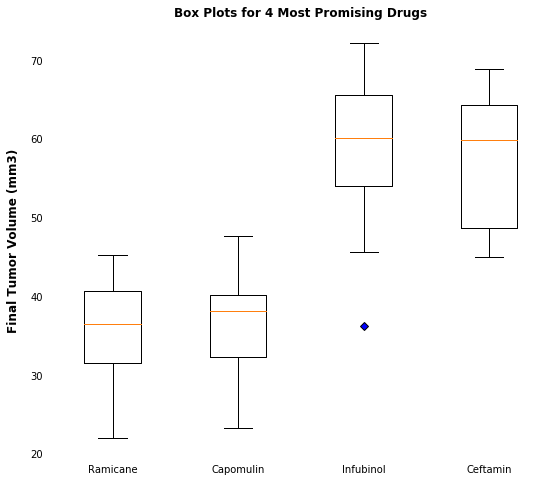

In [79]:
blue_diamond=dict(markerfacecolor='b', marker='D')
fig, ax = plt.subplots(figsize=(9,8))
ax.boxplot(volume_list, labels=drug_regimens, flierprops=blue_diamond)
ax.set_title('Box Plots for 4 Most Promising Drugs', fontweight='bold')
ax.tick_params(bottom=False, left=False)
ax.set_ylabel('Final Tumor Volume (mm3)', labelpad=10, fontweight='bold', fontsize='large')
ax.set_frame_on(False);

In [38]:
df_most_promising.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [39]:
s185_capomulin_df = df_most_promising[(df_most_promising['Drug Regimen'] == 'Capomulin') & (df_most_promising['Mouse ID'] == 's185')]
s185_capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


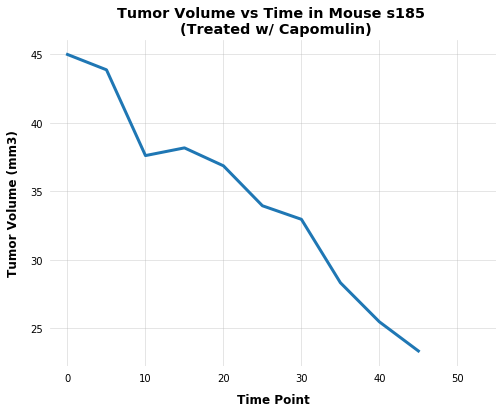

In [84]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(s185_capomulin_df['Timepoint'], s185_capomulin_df['Tumor Volume (mm3)'], lw=3)
ax.set_xlabel('Time Point', labelpad=10, fontweight='bold', fontsize='large')
ax.set_ylabel('Tumor Volume (mm3)', labelpad=10, fontweight='bold', fontsize='large')
ax.set_title('Tumor Volume vs Time in Mouse s185 \n (Treated w/ Capomulin)', fontweight='bold', fontsize='x-large')
ax.tick_params(bottom=False, left=False)
ax.set_frame_on(False)
ax.set_xlim(right=55)
ax.grid(True, alpha=0.4)

In [41]:
capomulin_df = df_most_promising[df_most_promising['Drug Regimen'] == 'Capomulin']
capomulin_df.tail()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0
1455,r157,Capomulin,Male,22,25,15,46.539206,0


In [42]:
capomulin_df['Weight (g)'].nunique()

9

In [43]:
weight_volume_capomulin_grouped_by_mouse_df = capomulin_df.groupby('Mouse ID')['Weight (g)', 'Tumor Volume (mm3)'].mean()
weight_volume_capomulin_grouped_by_mouse_df.head()

C:\Users\Tommy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


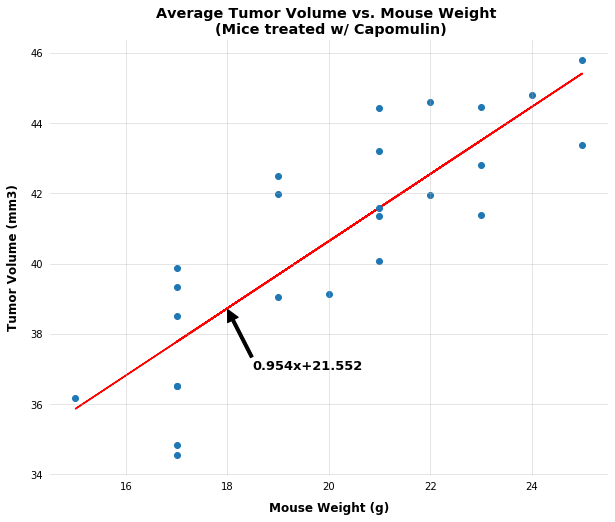

In [74]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x=weight_volume_capomulin_grouped_by_mouse_df['Weight (g)'], y=weight_volume_capomulin_grouped_by_mouse_df['Tumor Volume (mm3)'])
ax.set_title('Average Tumor Volume vs. Mouse Weight \n (Mice treated w/ Capomulin)', fontweight='bold', fontsize='x-large')
ax.set_xlabel('Mouse Weight (g)', fontsize='large', fontweight='bold', labelpad=10)
ax.set_ylabel('Tumor Volume (mm3)', fontsize='large', fontweight='bold', labelpad=10)
ax.set_frame_on(False)
ax.tick_params(bottom=False, left=False)
ax.grid(True, alpha=0.4)
ax.plot(weight_volume_capomulin_grouped_by_mouse_df['Weight (g)'], line, 'r', zorder=0)
#ax.text(19,37, s=f"{round(linreg.slope,3)}x+{round(linreg.intercept,3)}", fontsize=13)
ax.annotate(s=f"{round(linreg.slope,3)}x+{round(linreg.intercept,3)}", xy=(18,38.7), xytext=(18.5,37), arrowprops=dict(width=3, color='k'), fontsize=13, fontweight='bold');

In [59]:
linreg = stats.linregress(weight_volume_capomulin_grouped_by_mouse_df['Weight (g)'], weight_volume_capomulin_grouped_by_mouse_df['Tumor Volume (mm3)'])
corr_coeff = linreg.rvalue
line = linreg.slope * weight_volume_capomulin_grouped_by_mouse_df['Weight (g)'] + linreg.intercept
corr_coeff

0.8419363424694718